#COVID 19

In [1]:
#Import library yang dibutuhkan

import json
import numpy as np
import pandas as pd
import requests

In [2]:
#Membuat Fungsi get API

#Fungsi yang digunakan adalah get_json dengan parameter api_url. Fungsi ini digunakan untuk mengembalikan value berupa python dictionary jika status_code yang dihasilkan adalah 200.

def get_json(api_url):
  response = requests.get(api_url)
  if response.status_code == 200:
    return json.loads(response.content.decode('utf-8'))
  else:
    return None

In [4]:
#Memanggil API Covid 19

record_date = '2020-09-16'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url)) #hasil respon api

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-09-15T23:22:53  6602981  195693    2495127
1      IN  2020-09-15T23:22:53  4930236   80776    3859399
2      BR  2020-09-15T23:22:53  4345610  132006    3798285
3      RU  2020-09-15T23:22:53  1069873   18723     881693
4      PE  2020-09-15T23:22:53   733860   30812     573364


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [6]:
#Mengubah tipe data pada kolom last_update menjadi datetime

df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x:x.date())

In [7]:
#Mengambil data countries

countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2' : 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [8]:
#Merge Covid19 Data dan Countries

df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-09-15  6602981  195693    2495127  United States of America
1      IN  2020-09-15  4930236   80776    3859399                     India
2      BR  2020-09-15  4345610  132006    3798285                    Brazil
3      RU  2020-09-15  1069873   18723     881693        Russian Federation
4      PE  2020-09-15   733860   30812     573364                      Peru


In [9]:
#Menghitung fatality_ratio

df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

In [10]:
#Negara-negara dengan Fatality Ratio Tertinggi

df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio',ascending=False).head(20)

#Visualisasi

In [11]:
#Import library
import matplotlib.pyplot as plt

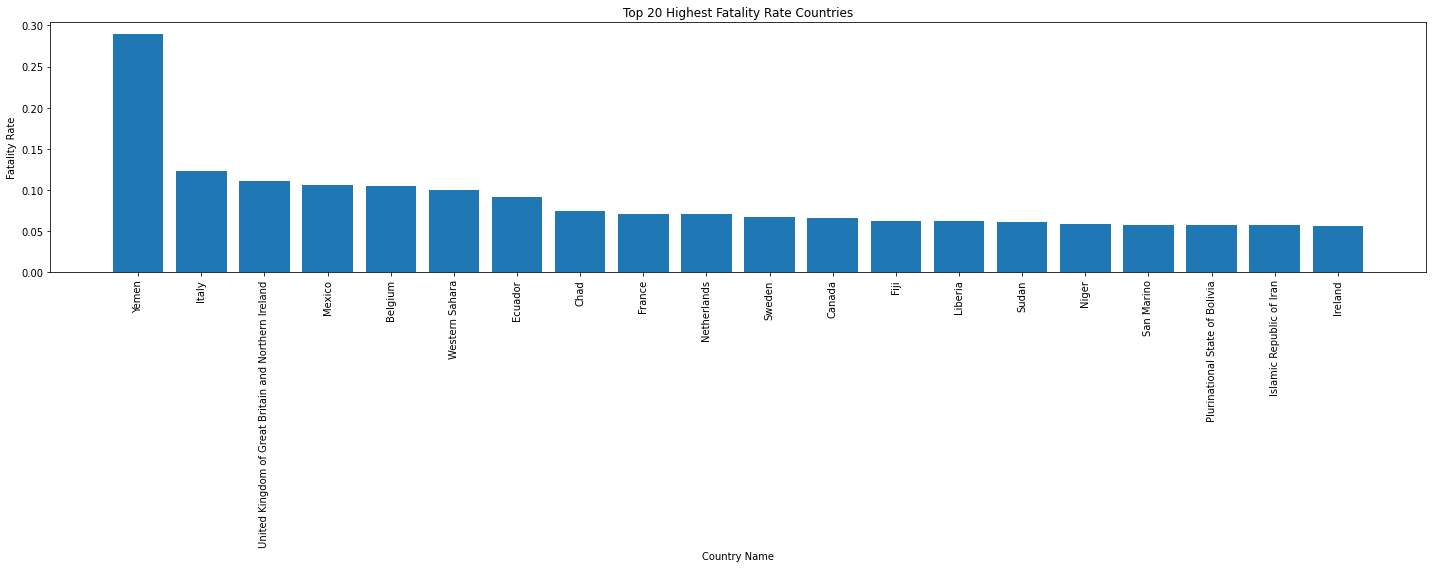

In [12]:
#Visualisasi Negara dengan Fatality Ratio Tertinggi

plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Kasus Covid-19 di ASEAN

In [13]:
#Menggabungkan Dataframe

countries = ['ID', 'MY', 'SG', 'TH', 'VN']
i = 0
for country in countries:
  covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
  df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
  df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
  df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
  if i==0:
    df_covid_timeline_merged = df_covid_timeline
  else:
    df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
  i=i+1

print(df_covid_timeline_merged.head())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


  country last_update  cases  deaths  recovered
0      VN  2020-09-19   1068      35        942
1      VN  2020-09-18   1068      35        941
2      VN  2020-09-17   1066      35        940
3      VN  2020-09-16   1063      35        936
4      VN  2020-09-15   1063      35        926


In [14]:
#Merge data Covid-19 dengan data country

df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

In [15]:
#Kasus Covid-19 di ASEAN pada bulan Maret 2020

import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

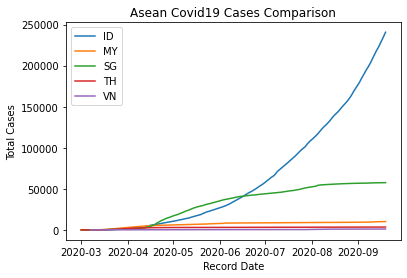

In [16]:
#Visualisasi kasus Covid-19 di ASEAN

import matplotlib.pyplot as plt
plt.clf()
countries = ['ID', 'MY', 'SG', 'TH', 'VN']
for country in countries:
  country_data = df_covid_timeline_denormalized['country']==country
  x = df_covid_timeline_denormalized[country_data]['last_update']
  y = df_covid_timeline_denormalized[country_data]['cases']
  plt.plot(x, y, label=country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()

#Negara yang masih terjebak di "Endless First Wave"

Sumber: European Centre for Disease Prevention and Control, BBC (15 September 2020)

In [19]:
#Menggabungkan Dataframe

countries = ['ID', 'AR', 'IQ', 'UA']
i = 0
for country in countries:
  covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
  df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
  df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
  df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
  if i==0:
    df_covid_timeline_merged = df_covid_timeline
  else:
    df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
  i=i+1

print(df_covid_timeline_merged.head())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


  country last_update   cases  deaths  recovered
0      UA  2020-09-19  177048    3585      79671
1      UA  2020-09-18  173703    3535      78273
2      UA  2020-09-17  170373    3465      76636
3      UA  2020-09-16  166694    3404      74981
4      UA  2020-09-15  163678    3326      73422


In [20]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

In [21]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

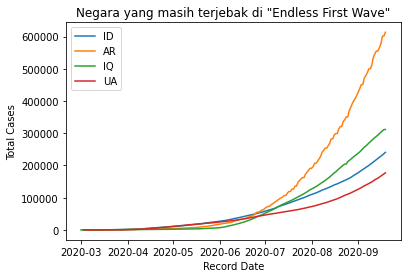

In [22]:
import matplotlib.pyplot as plt
plt.clf()
countries = ['ID', 'AR', 'IQ', 'UA']
for country in countries:
  country_data = df_covid_timeline_denormalized['country']==country
  x = df_covid_timeline_denormalized[country_data]['last_update']
  y = df_covid_timeline_denormalized[country_data]['cases']
  plt.plot(x, y, label=country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Negara yang masih terjebak di "Endless First Wave"')
plt.show()

<Figure size 432x288 with 0 Axes>

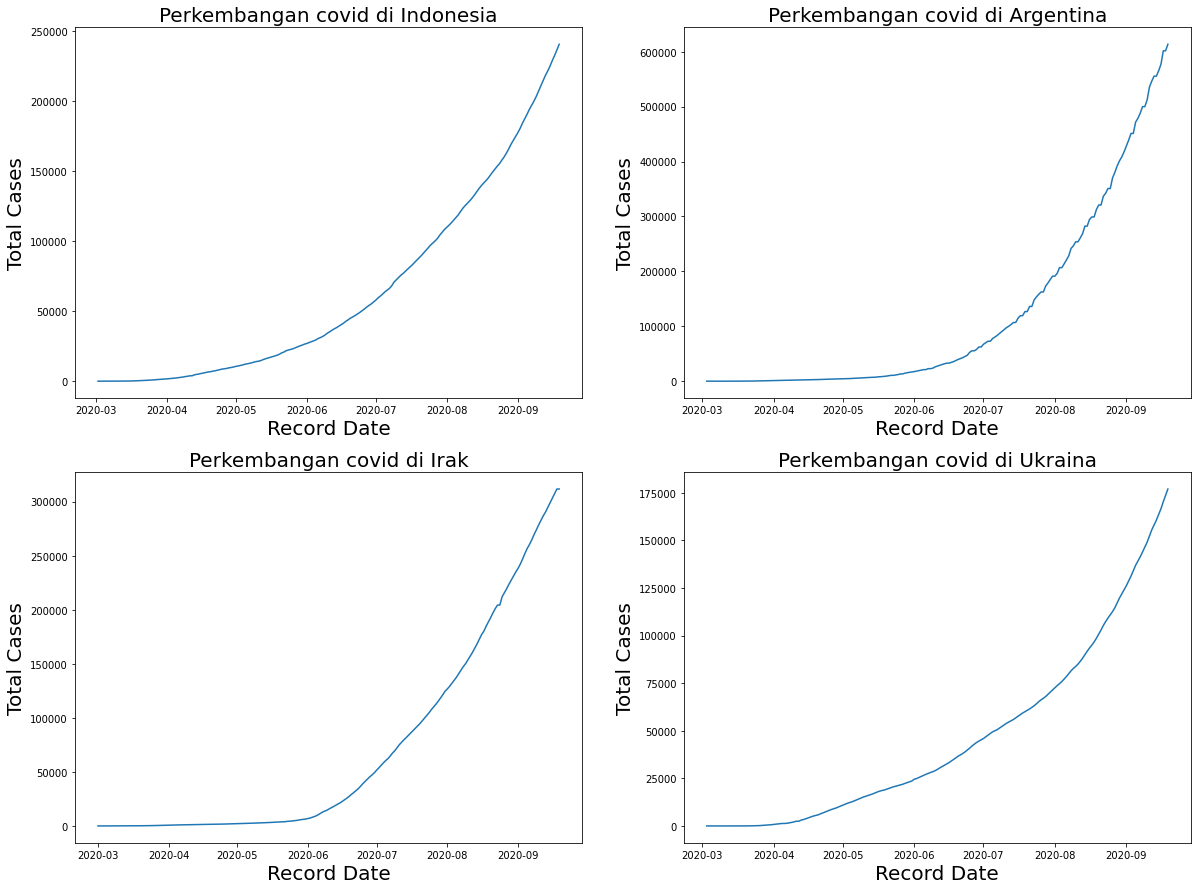

In [42]:
plt.clf()

fig = plt.figure(figsize=(20,15))
country_data = df_covid_timeline_denormalized['country']=='ID'
x = df_covid_timeline_denormalized[country_data]['last_update']
y = df_covid_timeline_denormalized[country_data]['cases']
plt.subplot(2,2,1)
plt.plot(x, y, label='ID')
plt.xlabel('Record Date', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Perkembangan covid di Indonesia', fontsize=20)

country_data1 = df_covid_timeline_denormalized['country']=='AR'
x1 = df_covid_timeline_denormalized[country_data1]['last_update']
y1 = df_covid_timeline_denormalized[country_data1]['cases']
plt.subplot(2,2,2)
plt.plot(x1, y1, label='AR')
plt.xlabel('Record Date', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Perkembangan covid di Argentina', fontsize=20)

country_data2 = df_covid_timeline_denormalized['country']=='IQ'
x2 = df_covid_timeline_denormalized[country_data2]['last_update']
y2 = df_covid_timeline_denormalized[country_data2]['cases']
plt.subplot(2,2,3)
plt.plot(x2, y2, label='IQ')
plt.xlabel('Record Date', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Perkembangan covid di Irak', fontsize=20)

country_data3 = df_covid_timeline_denormalized['country']=='UA'
x3 = df_covid_timeline_denormalized[country_data3]['last_update']
y3 = df_covid_timeline_denormalized[country_data3]['cases']
plt.subplot(2,2,4)
plt.plot(x3, y3, label='UA')
plt.xlabel('Record Date', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)
plt.title('Perkembangan covid di Ukraina', fontsize=20)

plt.show()
